# ML_day2

# Colab에서 실행하기

https://colab.research.google.com/github/SLCFLAB/FinTech2021/blob/main/ML_day2.ipynb

In [56]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

## Regression 전에 데이터 특성 살펴보기

In [57]:
housing = pd.read_csv("./housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     7299
INLAND        4929
NEAR OCEAN    1489
NEAR BAY      1487
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15210.000000,15210.000000,15210.000000,15210.000000,15062.000000,15210.000000,15210.000000,15210.000000,15210.000000
mean,-119.013605,35.157512,28.958909,2639.069954,543.708405,1443.109467,502.916568,3.803106,198435.696187
std,1.840608,2.049149,12.366761,2266.803851,437.779990,1142.507915,394.184695,1.888558,111404.650522
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,23.000000
25%,-120.380000,33.870000,19.000000,1430.000000,295.000000,791.000000,278.000000,2.510175,116700.000000
50%,-118.280000,34.080000,30.000000,2092.000000,433.000000,1167.000000,407.000000,3.454250,170700.000000
75%,-117.900000,36.950000,37.000000,3107.000000,648.000000,1742.000000,602.000000,4.660575,245775.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


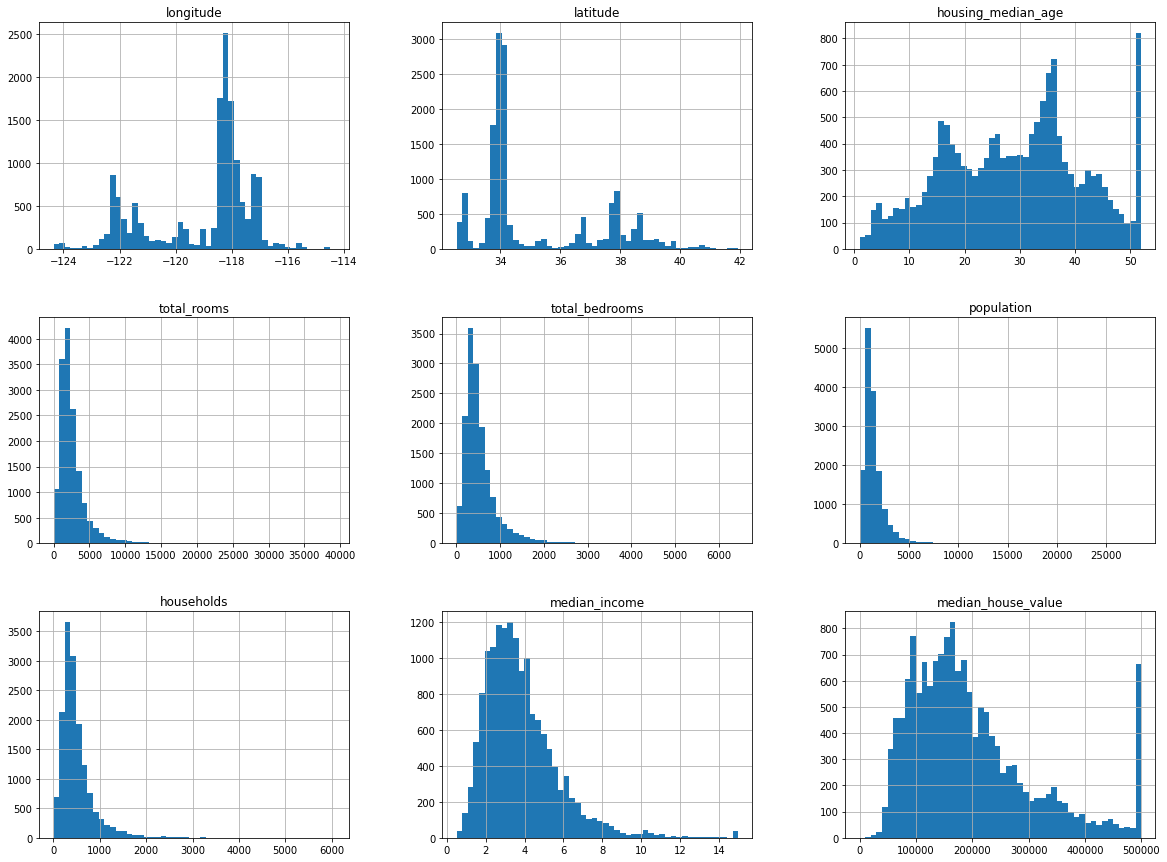

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

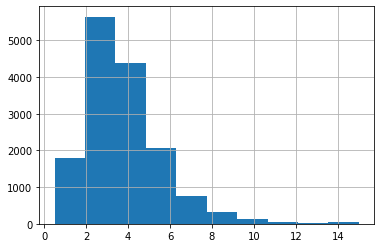

In [9]:
housing["median_income"].hist()

In [10]:
corr_matrix = housing.corr()

In [11]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.930435,-0.081186,0.035471,0.065559,0.099139,0.054572,0.037959,0.078021
latitude,-0.930435,1.000000,-0.031497,-0.013397,-0.052162,-0.101685,-0.062405,-0.105180,-0.226672
housing_median_age,-0.081186,-0.031497,1.000000,-0.380050,-0.346868,-0.312717,-0.326337,-0.132122,0.067785
total_rooms,0.035471,-0.013397,-0.380050,1.000000,0.929554,0.859815,0.915375,0.212847,0.140808
total_bedrooms,0.065559,-0.052162,-0.346868,0.929554,1.000000,0.884828,0.977903,0.004213,0.053898
population,0.099139,-0.101685,-0.312717,0.859815,0.884828,1.000000,0.916217,0.008246,-0.021711
households,0.054572,-0.062405,-0.326337,0.915375,0.977903,0.916217,1.000000,0.024339,0.069840
median_income,0.037959,-0.105180,-0.132122,0.212847,0.004213,0.008246,0.024339,1.000000,0.696207
median_house_value,0.078021,-0.226672,0.067785,0.140808,0.053898,-0.021711,0.069840,0.696207,1.000000


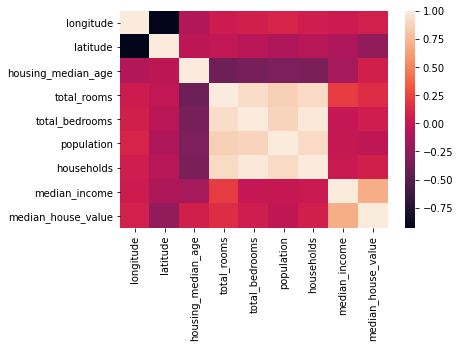

In [12]:
import seaborn as sns
sns.heatmap(corr_matrix)

## Missing value

In [21]:
housing['total_bedrooms'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
15205    False
15206    False
15207    False
15208    False
15209    False
Name: total_bedrooms, Length: 15210, dtype: bool

In [22]:
housing['total_bedrooms'].isna().sum()

148

In [24]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [25]:
housing['total_bedrooms'].isna().sum()

0

## Linear Regression

In [58]:
housing = housing[['median_income', 'total_rooms', 'median_house_value']]

In [62]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [63]:
X_train, y_train = train_set[['median_income', 'total_rooms']], train_set['median_house_value']
X_train = np.array(X_train)
y_train = np.array(y_train)

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
X_test, y_test = test_set[['median_income', 'total_rooms']], test_set['median_house_value']
X_test = np.array(X_test)
y_test = np.array(y_test)

In [67]:
lin_reg.predict(X_test)

array([115063.02828707, 150508.05903646, 190185.37683414, ...,
       431458.75452442, 161227.07363911, 193540.13838055])

In [68]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

84210.3094307468

In [69]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mae

62987.5275786113

# Lasso, Ridge

In [70]:
from sklearn.linear_model import Lasso

clf = Lasso()
clf.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
X_test, y_test = test_set[['median_income', 'total_rooms']], test_set['median_house_value']
X_test = np.array(X_test)
y_test = np.array(y_test)

In [74]:
lin_reg.predict(X_test)

array([115063.02828707, 150508.05903646, 190185.37683414, ...,
       431458.75452442, 161227.07363911, 193540.13838055])

In [78]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
X_test, y_test = test_set[['median_income', 'total_rooms']], test_set['median_house_value']
X_test = np.array(X_test)
y_test = np.array(y_test)

In [80]:
lin_reg.predict(X_test)

array([115063.02828707, 150508.05903646, 190185.37683414, ...,
       431458.75452442, 161227.07363911, 193540.13838055])

## K-neighbor Regression

In [90]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [91]:
X_test, y_test = test_set[['median_income', 'total_rooms']], test_set['median_house_value']
X_test = np.array(X_test)
y_test = np.array(y_test)
neigh.predict(X_test)

array([103033.33333333, 165933.33333333, 195366.66666667, ...,
       341166.66666667, 107866.66666667, 183666.66666667])

In [92]:
y_pred = neigh.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

103458.96152050768

In [93]:
y_pred = neigh.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mae

78457.30886627907